<a href="https://colab.research.google.com/github/mariagrincon/HappyHalt/blob/main/Garcia_Alexnet_Slides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
import wandb as wb

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=device)

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image, size=224):
    means = [0.485, 0.456, 0.406]
    stds = [0.229, 0.224, 0.225]

    transform = transforms.Compose([
        transforms.RandomRotation(15),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.Resize(size),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(means, stds),
    ])
    tensor = transform(image)
    tensor = transform(image).unsqueeze(0).to(device)
    tensor.requires_grad = True
    return tensor



In [8]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [9]:
url = "https://docs.google.com/presentation/d/1pOZ_1rjRPOQzDorzjouzMwbGxG-qQ_Lpgo2EHonNbL8/edit#slide=id.p"

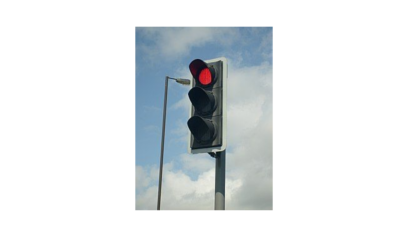

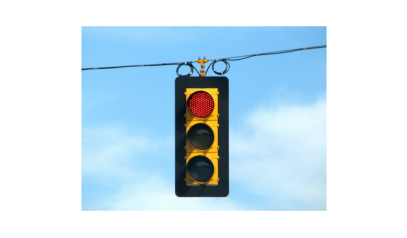

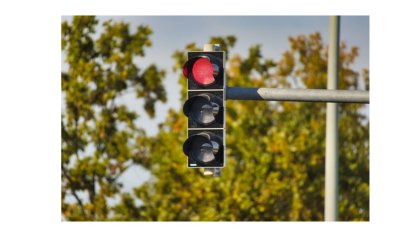

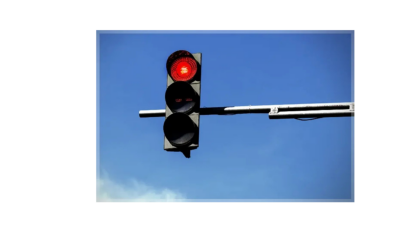

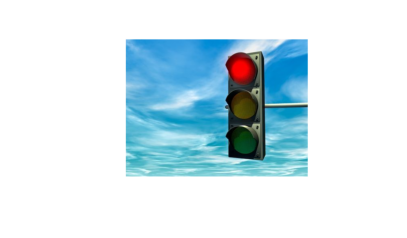

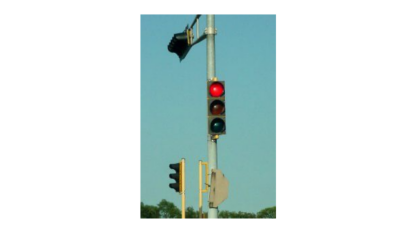

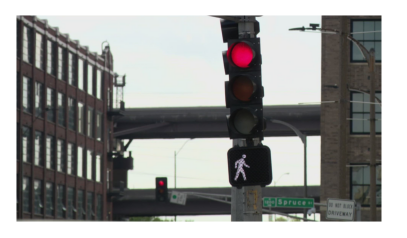

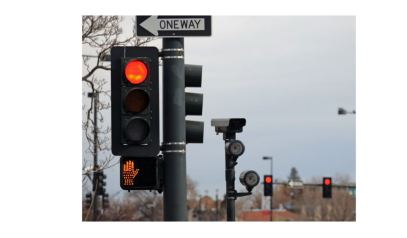

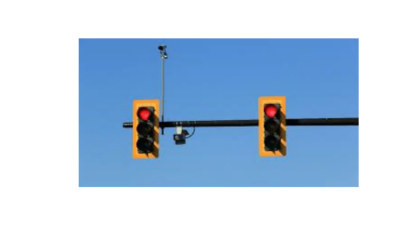

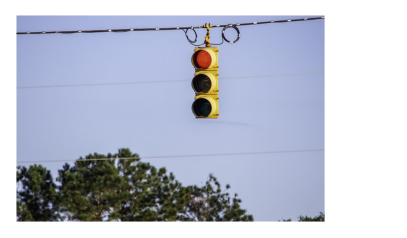

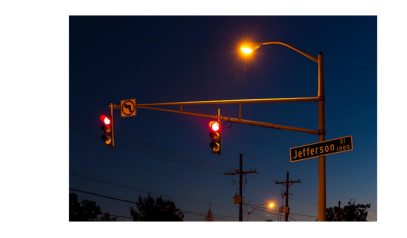

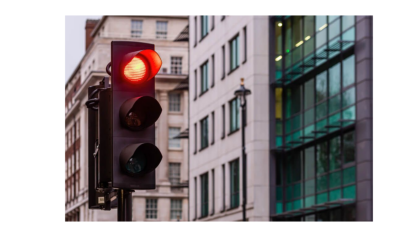

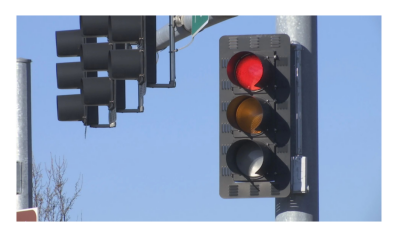

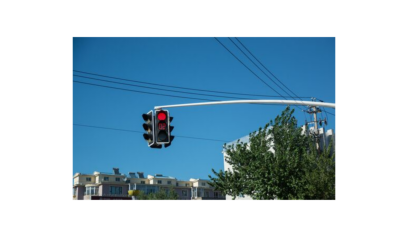

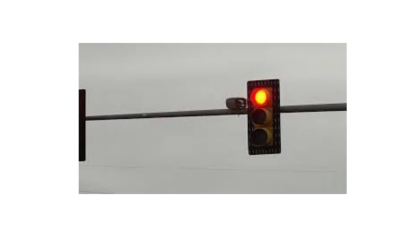

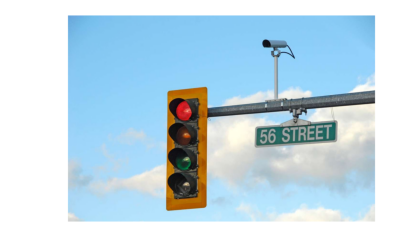

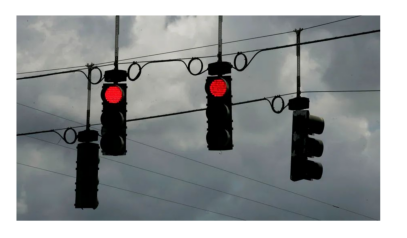

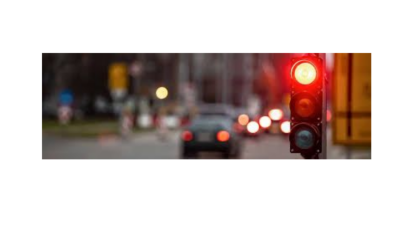

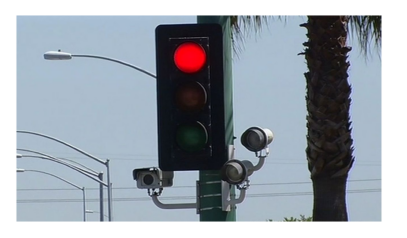

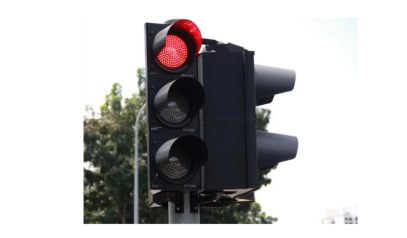

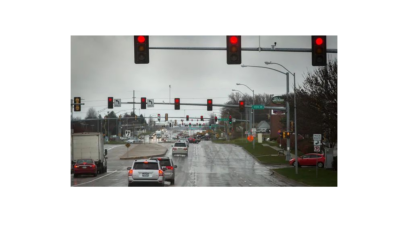

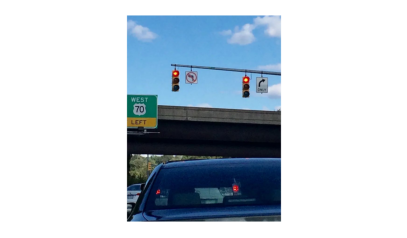

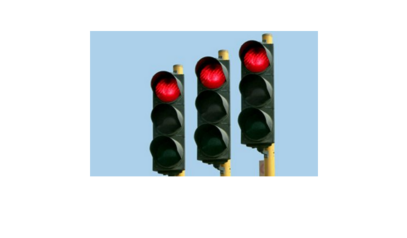

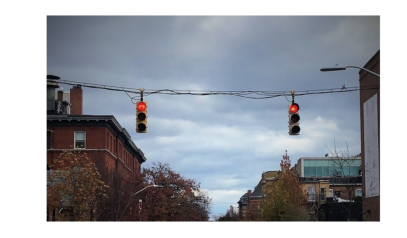

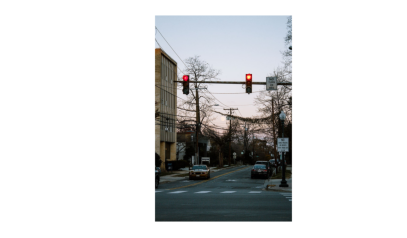

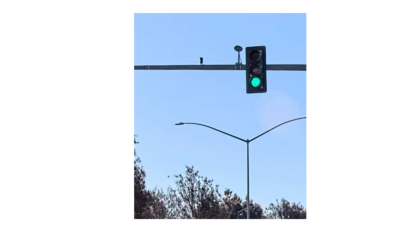

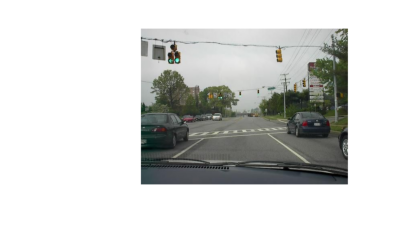

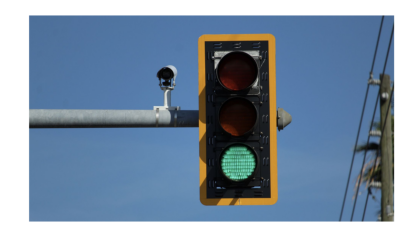

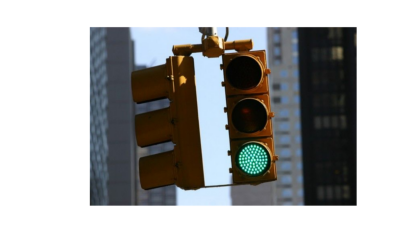

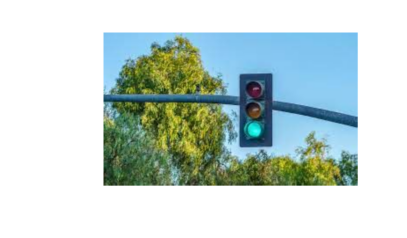

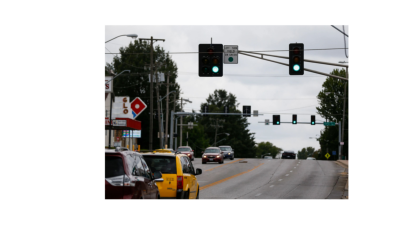

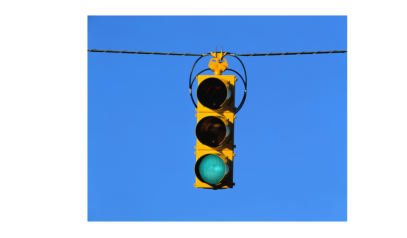

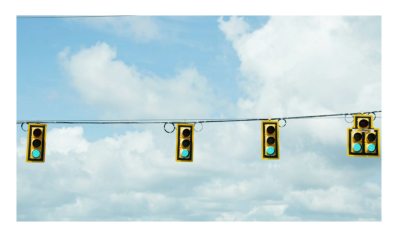

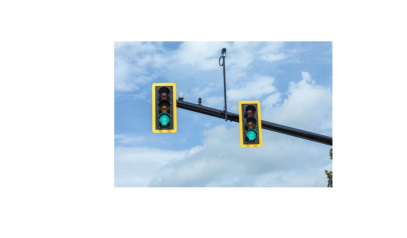

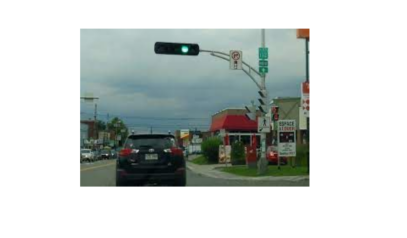

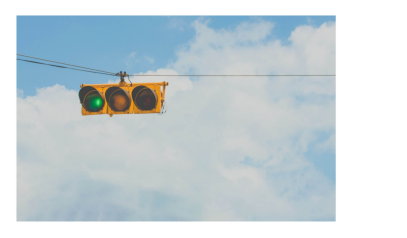

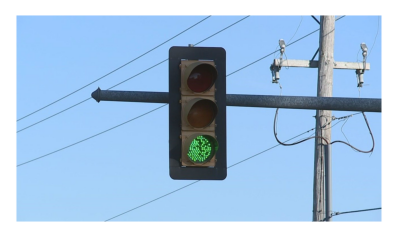

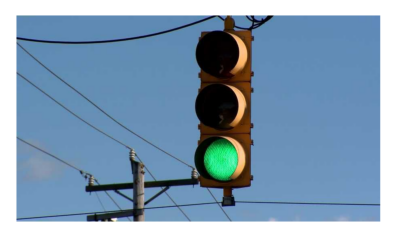

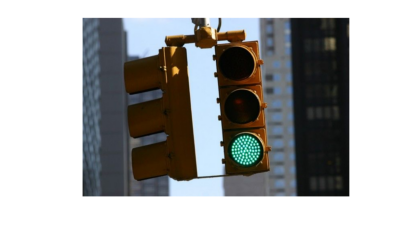

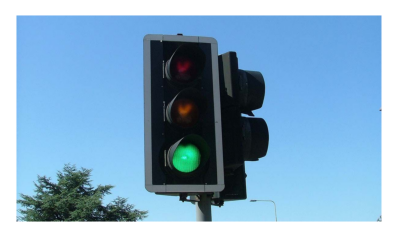

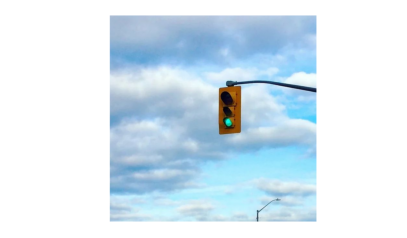

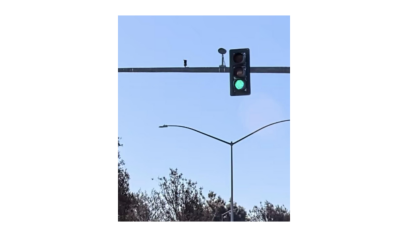

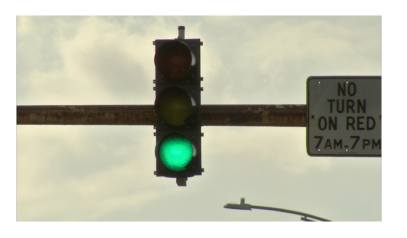

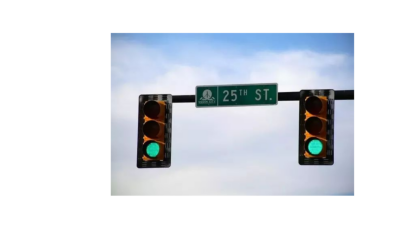

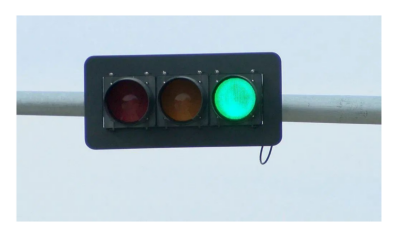

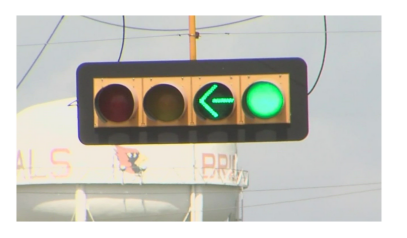

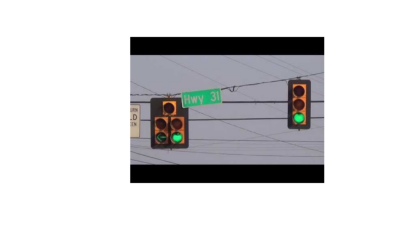

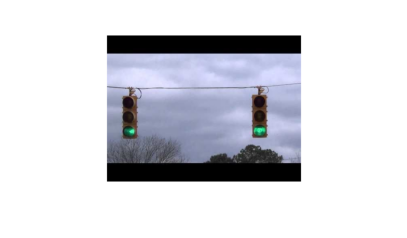

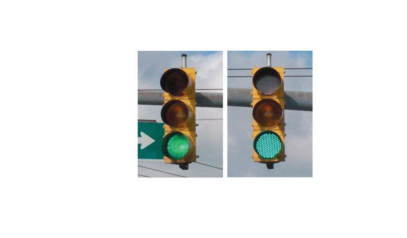

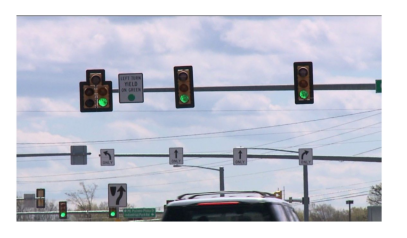

In [12]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape

In [15]:
model(images)

tensor([[-4.0835, -0.7753, -2.2249,  ..., -6.0969, -2.1726,  5.3094],
        [-3.6268, -1.1895, -1.6367,  ..., -6.3026, -0.1518,  4.4791],
        [-5.1277, -0.8700,  1.5669,  ...,  0.4844,  3.2961,  4.3166],
        ...,
        [-3.9727, -3.2396, -1.8348,  ..., -5.1494, -1.9000,  4.5091],
        [-4.7932,  1.6249, -1.7969,  ..., -5.8200,  2.0042,  4.5116],
        [-2.5916, -6.8077,  1.5948,  ..., -9.3689, -3.3133,  3.7171]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [14]:
y = model(images)

In [16]:
model.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [17]:
y.shape

torch.Size([50, 1000])

In [18]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [19]:
for i in list(guesses):
    print(labels[i])

binder, ring-binder
lighter, light, igniter, ignitor
pomegranate
pool table, billiard table, snooker table
screen, CRT screen
binder, ring-binder
barbell
traffic light, traffic signal, stoplight
barbell
notebook, notebook computer
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
binder, ring-binder
traffic light, traffic signal, stoplight
modem
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
chest
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
modem
traffic light, traffic signal, stoplight
envelope
iPod
desktop computer
binder, ring-binder
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
traffic light, traffic signal, stoplight
envelope
traffic light, traffic signal, stoplight
ambulance
traff

In [20]:
Y = np.zeros(50,)
Y[25:] = 1

In [21]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
# Y = np.zeros(100,)
# Y[50:] = 1

In [23]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
X = y.detach().cpu().numpy()

In [25]:
X.shape

(50, 1000)

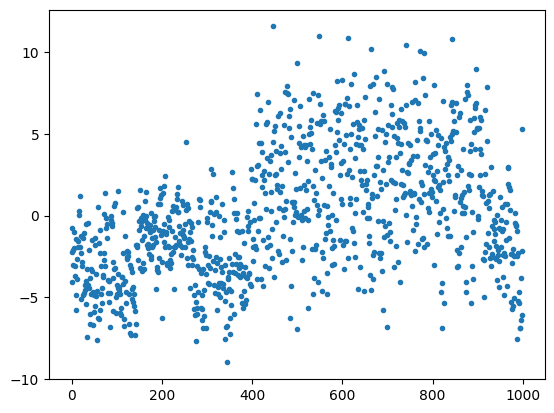

In [26]:
plt.plot(X[0],'.')

(array([ 11.,  73., 170., 215., 191., 129., 100.,  80.,  23.,   8.]),
 array([-8.97751045, -6.92444658, -4.87138271, -2.81831861, -0.76525462,
         1.28780937,  3.34087324,  5.39393711,  7.44700146,  9.50006485,
        11.5531292 ]),
 <BarContainer object of 10 artists>)

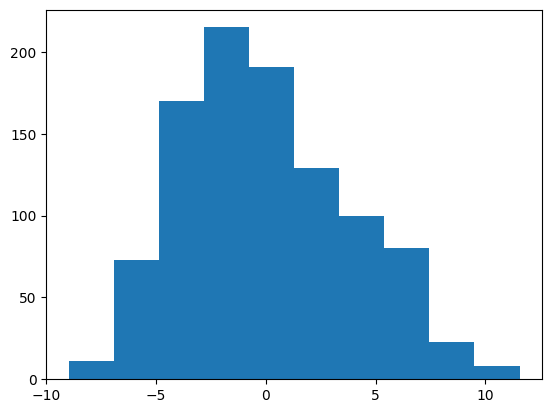

In [27]:
plt.hist(X[0])

In [28]:
X = GPU_data(X)
Y = GPU_data(Y)

In [29]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [30]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [31]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [32]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [33]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [34]:
X.shape

torch.Size([50, 1000])

In [35]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [36]:
def model(x,w):

    return x@w[0]

In [37]:
def make_plots():

    acc_train = acc(model(x,w),y)

    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [38]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-11-f7a8506cadc7>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=device)


TypeError: ignored

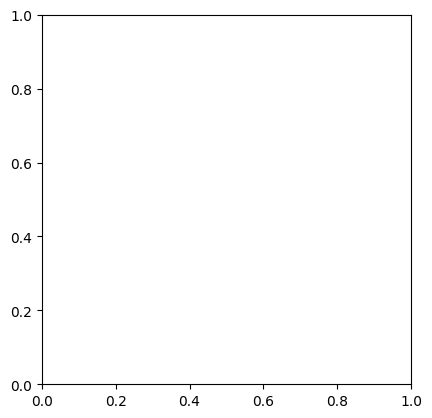

In [39]:
plot(images[0].detach().cpu().numpy())